In [22]:
import numpy as np
import pandas as pd
from os.path import join

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)

plt.style.use('ggplot')
import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
from nilmtk.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = DataSet("/Users/nipunbatra/Downloads/wikienergy-2.h5")

In [3]:
from nilmtk.disaggregate import FHMM

In [4]:
f = FHMM()

In [5]:
building=11
elec = ds.buildings[building].elec
top_5_elec  = elec.select_top_k(k=2)

11/11 ElecMeter(instance=11, building=11, dataset='WikiEnergy', appliances=[Appliance(type='electric water heating appliance', instance=1)])

In [6]:
f.train(top_5_elec, sample_period=600)

Training model for submeter 'ElecMeter(instance=2, building=11, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)])'


In [7]:
f.meters

[ElecMeter(instance=2, building=11, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)])]

In [8]:
g= FHMM()

In [9]:
g.train_across_homes(ds, list_of_homes=range(1, 5), list_of_appliances=['air conditioner', 'fridge'], sample_period=600)

Training for air conditioner
Means for air conditioner are
[[   14.10708691]
 [ 1699.63715065]]
Training for fridge
Means for fridge are
[[ 87.57696581]
 [  4.39466917]]


In [10]:
g.meters

[ElecMeter(instance=2, building=1, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)]),
 ElecMeter(instance=14, building=1, dataset='WikiEnergy', appliances=[Appliance(type='fridge', instance=1)])]

In [11]:
f.meters

[ElecMeter(instance=2, building=11, dataset='WikiEnergy', appliances=[Appliance(type='air conditioner', instance=1)])]

In [12]:
g.disaggregate_chunk(ds.buildings[21].elec.mains().power_series(sample_period=600).next()).head()

,air conditioner,fridge
localminute,,
2014-01-01 00:00:00-06:00,14,88
2014-01-01 00:10:00-06:00,14,88
2014-01-01 00:20:00-06:00,14,88
2014-01-01 00:30:00-06:00,14,88
2014-01-01 00:40:00-06:00,14,88


In [13]:
g.disaggregate_across_homes(HDFDataStore("/Users/nipunbatra/Desktop/test_across_homes_new.h5","w"),ds, list_of_homes=[21, 22])

Disaggregating for home 21
Disaggregating for home 22


In [14]:
disag = DataSet("/Users/nipunbatra/Desktop/test_across_homes_new.h5")

In [15]:
disag.buildings

OrderedDict([(21, Building(instance=21, dataset='FHMM')), (22, Building(instance=22, dataset='FHMM'))])

In [16]:
disag.buildings[21].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=21, dataset='FHMM', site_meter, appliances=[])
  ElecMeter(instance=2, building=21, dataset='FHMM', appliances=[Appliance(type='air conditioner', instance=1)])
)

In [17]:
disag.buildings[22].elec

MeterGroup(meters=
  ElecMeter(instance=8, building=22, dataset='FHMM', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=1, building=22, dataset='FHMM', site_meter, appliances=[])
  ElecMeter(instance=2, building=22, dataset='FHMM', appliances=[Appliance(type='air conditioner', instance=1)])
)

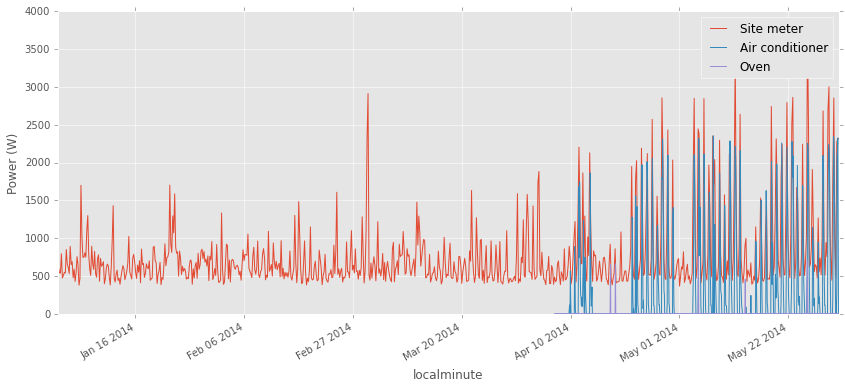

In [23]:
ds.buildings[21].elec.plot()

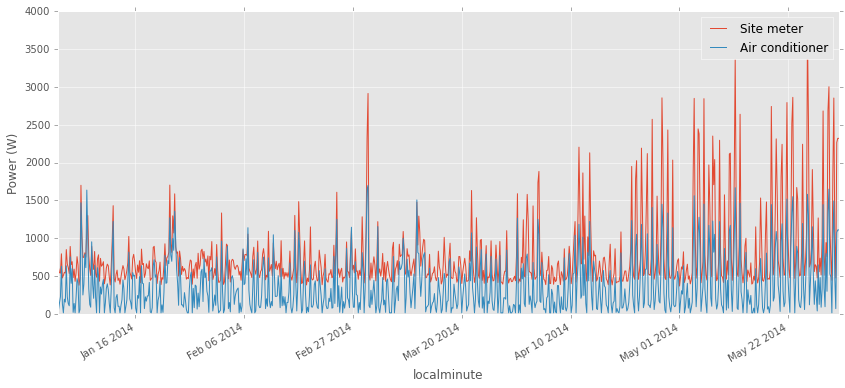

In [24]:
disag.buildings[21].elec.plot()

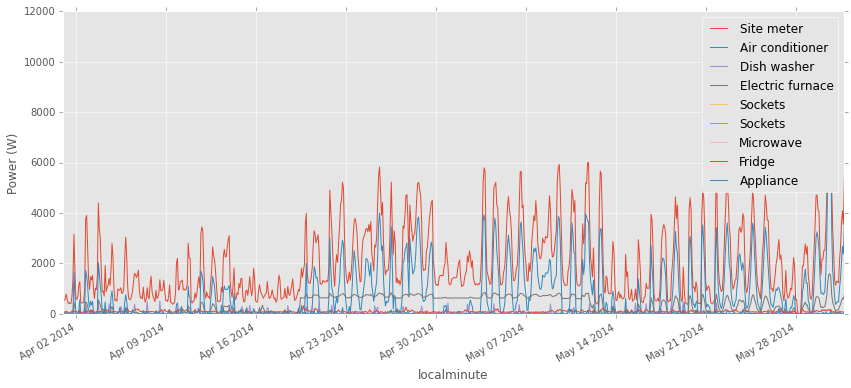

In [25]:
ds.buildings[22].elec.plot()

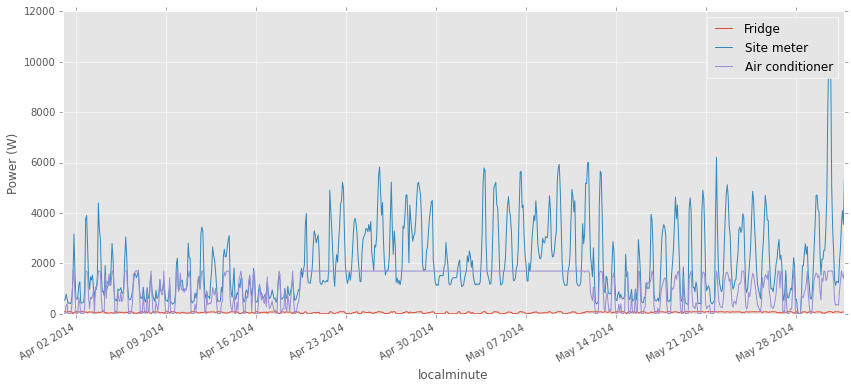

In [28]:
disag.buildings[22].elec.plot()


In [30]:
from nilmtk.metrics import f1_score, mean_normalized_error_power, fraction_energy_assigned_correctly

In [31]:
disag_elec = disag.buildings[22].elec
elec = ds.buildings[22].elec

In [32]:
mean_normalized_error_power(disag_elec, elec)

2    1.405120
8    0.524565
dtype: float64

In [33]:
f1_score(disag_elec, elec)

2    0.378929
8    0.757095
dtype: float64

In [34]:
fraction_energy_assigned_correctly(disag_elec, elec)

8/8 ElecMeter(instance=9, building=22, dataset='WikiEnergy', appliances=[Appliance(type='appliance', instance=1)])

0.66216218132008542

In [35]:
st = pd.HDFStore("/Users/nipunbatra/Desktop/test_across_homes_new.h5")

In [36]:
st

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/nipunbatra/Desktop/test_across_homes_new.h5
/building21/elec/meter1                                frame_table  (typ->appendable,nrows->216777,ncols->1,indexers->[index])
/building21/elec/meter2                                frame_table  (typ->appendable,nrows->216777,ncols->1,indexers->[index])
/building22/elec/cache/meter2/good_sections            frame_table  (typ->appendable,nrows->1,ncols->3,indexers->[index])     
/building22/elec/cache/meter2/total_energy             frame_table  (typ->appendable,nrows->1,ncols->2,indexers->[index])     
/building22/elec/cache/meter8/good_sections            frame_table  (typ->appendable,nrows->1,ncols->3,indexers->[index])     
/building22/elec/cache/meter8/total_energy             frame_table  (typ->appendable,nrows->1,ncols->2,indexers->[index])     
/building22/elec/meter1                                frame_table  (typ->appendable,nrows->87539,ncols->1,indexers->[index]) 
/building22